In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Ubuntu'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Inconsolata Medium'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 26
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 17
plt.rcParams['figure.titlesize'] = 17
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [3]:
df = pd.read_csv("data/results_rq2b.csv")

In [4]:
df

,Unnamed: 0,Name,Status,Bloat Files,Used Files,Bloated Functions,Used Functions,percentage_bloated_functions,percentage_bloated_files
0,0,cryptography,Inactive,58,14,1253,40,0.97,0.81
1,1,aiohttp,Inactive,40,5,1217,15,0.99,0.89
2,2,cryptography,Inactive,55,17,1222,76,0.94,0.76
3,3,configobj,Inactive,2,1,102,31,0.77,0.67
4,4,aiohttp,Inactive,42,3,1227,10,0.99,0.93
...,...,...,...,...,...,...,...,...,...
144,144,Werkzeug,Inactive,33,10,1142,40,0.97,0.77
145,145,cryptography,Inactive,69,3,1289,3,1.00,0.96
146,146,aiohttp,Inactive,39,6,1227,8,0.99,0.87
147,147,cleo,Active,35,29,458,127,0.78,0.55


findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


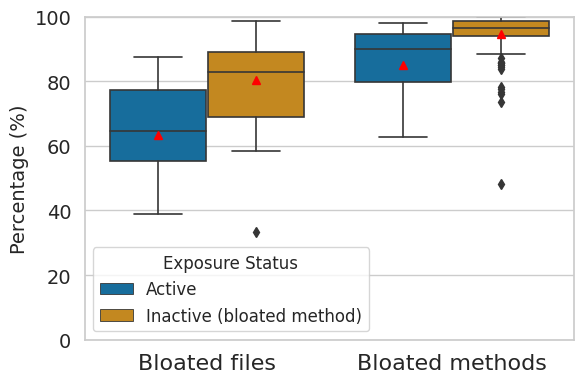

In [5]:
metrics_count = ['percentage_bloated_files', 'percentage_bloated_functions']

# Define a rename dictionary for nicer axis labels
rename_dict = {
    'percentage_bloated_functions': 'Bloated methods',
        'percentage_bloated_files': 'Bloated files',


}

# Melt the DataFrame
df_melted = df[metrics_count + ['Status']].melt(id_vars='Status', var_name='metric', value_name='value')

# Map the metric names to more readable ones
df_melted['metric'] = df_melted['metric'].map(rename_dict)
# df_melted['Status'] = df_melted['Status'].map({'active': 'Active Exposure', 'inactive': 'Inactive Exposure'})

df_melted['value'] = df_melted['value'] * 100  # Convert fractions to percentages
hue_order = ['Active', 'Inactive']

# Plot
ax = sns.boxplot(data=df_melted, x="metric", y="value", hue="Status", 
                 orient='v', linewidth=1.2, palette="colorblind",
                 showmeans=True,
                 meanprops={"marker":"^","markerfacecolor":"red", "markeredgecolor":"red"},
                 hue_order=hue_order)


handles, labels = ax.get_legend_handles_labels()

# Modify the label text where necessary
for i, label in enumerate(labels):
    if label == 'Inactive':
        labels[i] = 'Inactive (bloated method)'

ax.legend(handles, labels, title="Exposure Status", frameon=True, prop={"size": 12})
plt.ylim([0, 100])
plt.xlabel("")
plt.ylabel("Percentage (%)")
plt.tight_layout()
plt.savefig('figures/rq2b.pdf', bbox_inches='tight',)
plt.show()

In [6]:
mean= df_melted.groupby(['metric', 'Status'])['value'].mean().reset_index()


In [7]:
mean

,metric,Status,value
0,Bloated files,Active,63.47
1,Bloated files,Inactive,80.22
2,Bloated methods,Active,85.07
3,Bloated methods,Inactive,94.59


In [8]:
x = df[df["Status"]=="Inactive"]

In [9]:
x 

,Unnamed: 0,Name,Status,Bloat Files,Used Files,Bloated Functions,Used Functions,percentage_bloated_functions,percentage_bloated_files
0,0,cryptography,Inactive,58,14,1253,40,0.97,0.81
1,1,aiohttp,Inactive,40,5,1217,15,0.99,0.89
2,2,cryptography,Inactive,55,17,1222,76,0.94,0.76
3,3,configobj,Inactive,2,1,102,31,0.77,0.67
4,4,aiohttp,Inactive,42,3,1227,10,0.99,0.93
...,...,...,...,...,...,...,...,...,...
143,143,requests,Inactive,11,7,221,15,0.94,0.61
144,144,Werkzeug,Inactive,33,10,1142,40,0.97,0.77
145,145,cryptography,Inactive,69,3,1289,3,1.00,0.96
146,146,aiohttp,Inactive,39,6,1227,8,0.99,0.87
